In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv(r'C:\Users\Suchana Hazra\OneDrive\Desktop\ml projects\income(1).csv')

In [4]:
dataset

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[['Age']])
dataset['Age'] = scaler.transform(dataset[['Age']])
dataset

,Name,Age,Income($)
0,Rob,0.058824,70000
1,Michael,0.176471,90000
2,Mohan,0.176471,61000
3,Ismail,0.117647,60000
4,Kory,0.941176,150000
5,Gautam,0.764706,155000
6,David,0.882353,160000
7,Andrea,0.705882,162000
8,Brad,0.588235,156000
9,Angelina,0.529412,130000


In [6]:
scaler = MinMaxScaler()
scaler.fit(dataset[['Income($)']])
dataset['Income($)'] = scaler.transform(dataset[['Income($)']])
dataset

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [7]:
from sklearn.cluster import KMeans

In [8]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(dataset[['Age','Income($)']])
    sse.append(km.inertia_)

In [9]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.31706796182983854,
 0.2512332708605224,
 0.19657271236563972,
 0.1803009711617348,
 0.11190781744710707]

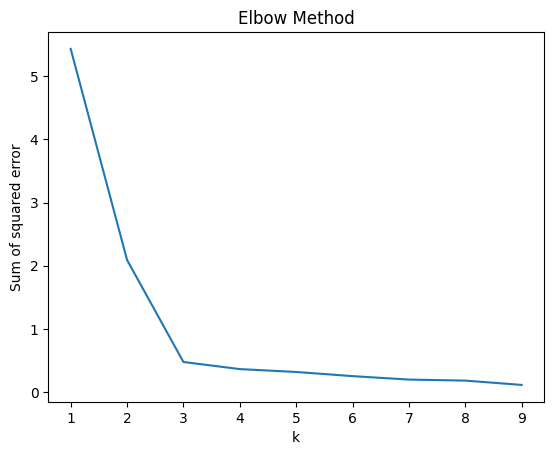

In [10]:
import matplotlib.pyplot as plt
k_rng = range(1,10)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [11]:
df = dataset[['Age','Income($)']]
df

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_predict = km.fit_predict(df)
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster'] = y_predict
df

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [31]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

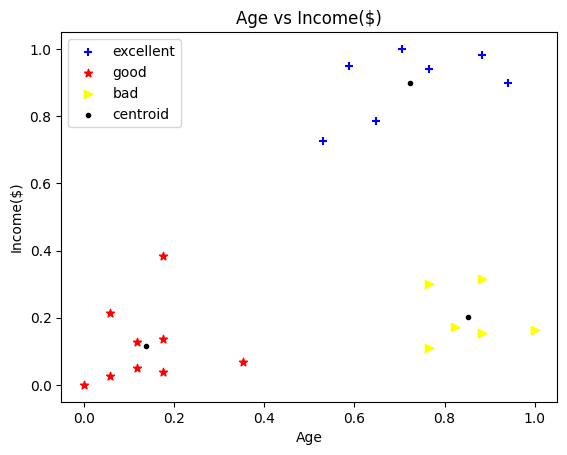

In [38]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
plt.title('Age vs Income($)')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df1['Age'],df1['Income($)'],color = 'blue', marker = '+',label = 'excellent')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red', marker = '*',label = 'good')
plt.scatter(df3['Age'],df3['Income($)'],color = 'yellow', marker = '>',label = 'bad')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker='.',label = 'centroid')
plt.legend()